**Python Data Analytics | Due: May 2, 2023**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np

#import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing another libary in sklearn
from sklearn.model_selection import train_test_split

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.0 MB/s eta 0:00:00


**Step 1: Problem Definition** Choose a problem with an available data set. This problem should either fall into regression or classification groups. You can choose one of the datasets that are listed below. You are also free to select another dataset that you are familiar with. You must write a summary of the problem and the associated dataset.

I have chosen the California data set. It falls into the regression group. The problem that I intend to tackle with this data set is the finding the relationship between house value and the total amount of rooms.

In [ ]:
#upload the file
from google.colab import files

df = files.upload()

Saving california_housing.csv to california_housing.csv


In [ ]:
#set our data frame 
df=pd.read_csv("california_housing.csv") 
#show datafram #use .head() for first five 
#use .tail() for last five
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...,...
19995,16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


# Dataframe 1 : Median House Price to Number of Houses


In [ ]:
#reset dataframe to only valid columns needed
df1 = df[['total_bedrooms', 'median_house_value','total_rooms']]
df1.head()

,total_bedrooms,median_house_value,total_rooms
0,661.0,344700.0,3885.0
1,310.0,176500.0,1510.0
2,507.0,270500.0,3589.0
3,15.0,330000.0,67.0
4,244.0,81700.0,1241.0


**Step 2: Data Splitting:** This step should start with creating two data frames: response and features. Split these data frames into train and test parts.

In [ ]:
#ive already imported the train split

In [ ]:
features = ['total_rooms','total_bedrooms']
X = df1[features] 
Y = df1['median_house_value']

<Figure size 9000x5000 with 0 Axes>

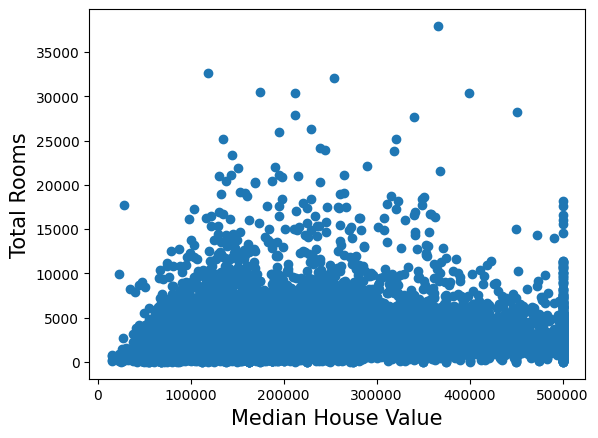

<Figure size 9000x5000 with 0 Axes>

In [ ]:
X1 = df1['median_house_value']
Y1 = df1['total_rooms']
plt.xlabel('Median House Value', fontsize=15)
plt.ylabel('Total Rooms', fontsize = 15) 

plt.scatter(X1,Y1)
plt.figure(figsize=(90,50))

In [ ]:
#creating the data frames & split them
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Step 3: Model Selection, Model Fitting, and Model Evaluation:**  Choose an appropriate model that can be used for your problem. You can choose linear regression or decision trees. You are also free to select another model that you are familiar with. Fit your train data to your model. Generate predictions over the test data and then evaluate your model by reporting appropriate accuracy metrics.

In [ ]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#viewing R^2 value
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.05821478671020619


In [ ]:
#viewing other values in formula
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  197498.8430361775
The coef (b_1) is  33.80245674095249
The coef (b_2) is  -148.6791238949099


The formula would be:
$y= 197498.84 + 33.80x_1 -148.68x_2$


In [ ]:
house_price_pred = my_linear_regression.predict(X_test)
house_price_pred 

array([207039.00241735, 194230.97245845, 236176.99927844, ...,
       188512.26869283, 183776.64789183, 200989.25166264])

# Longitude and Latitude Map

In [ ]:
df2 = df[['latitude','longitude']]

In [ ]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df2,
                        lat="latitude", 
                        lon="longitude", 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

This one was done with the help of the internet. Specifically this [link](https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6).

# House Value Distribution across California

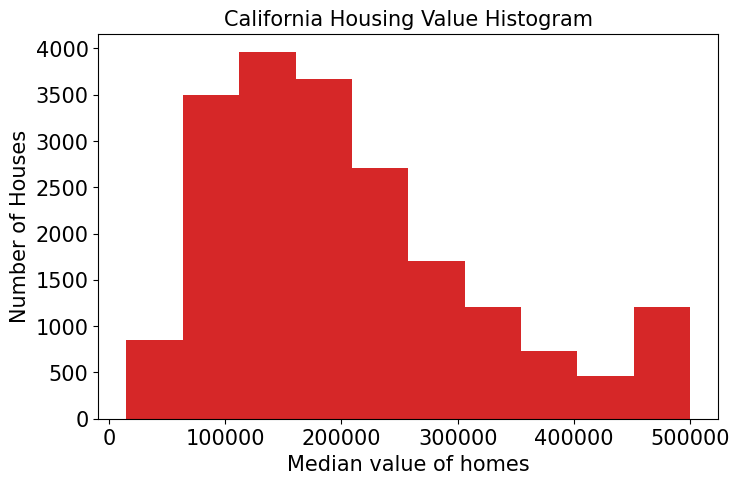

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df['median_house_value'], color = 'Tab:red')
plt.title('California Housing Value Histogram', fontsize = 15)
plt.xlabel('Median value of homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

#Population : Households

In [ ]:
#reset dataframe to only valid columns needed
df3 = df[['population', 'households']]
df3.head()

,population,households
0,1537.0,606.0
1,809.0,277.0
2,1484.0,495.0
3,49.0,11.0
4,850.0,237.0


<Figure size 9000x5000 with 0 Axes>

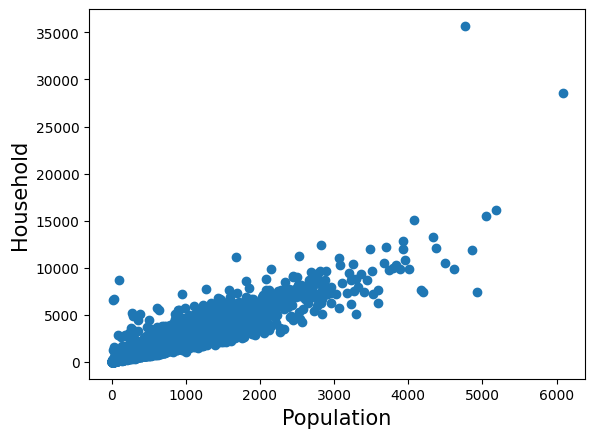

<Figure size 9000x5000 with 0 Axes>

In [ ]:
X3 = df3['households']
Y3 = df3['population']
plt.xlabel('Population', fontsize=15)
plt.ylabel('Household', fontsize = 15) 

plt.scatter(X3,Y3)
plt.figure(figsize=(90,50))

#Multiple Linear Regression Model for Median House Value

In [ ]:
df3 = df

In [ ]:
features_names = df.columns.to_list()[:-1]
X3 = df3[features_names] # features
Y3 = df3['median_house_value'] # response or target variable

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
my_linear_regression1 = LinearRegression()
my_linear_regression1.fit(X_train, Y_train) 

LinearRegression()

In [ ]:
pred = my_linear_regression1.predict(X_test)
pred

array([207039.00241735, 194230.97245845, 236176.99927844, ...,
       188512.26869283, 183776.64789183, 200989.25166264])

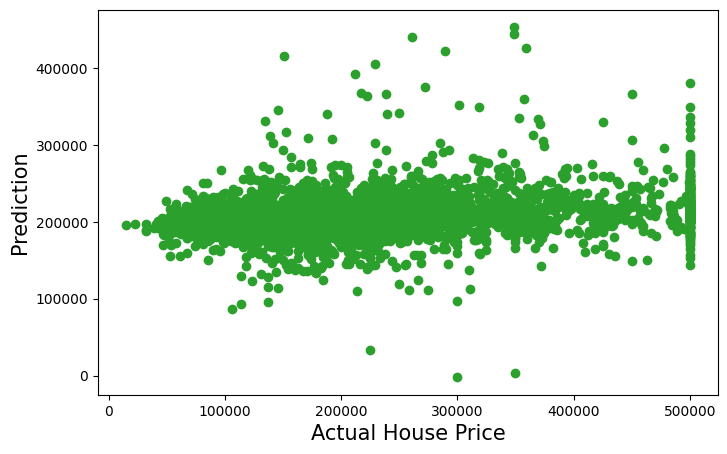

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Median House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

#**Step 4: Finals Remarks:** Summarize your results and address the conclusions.




From the histogram, I can tell that majority of the houses are in the 100k to 200k value. There seems to be a weird spike towards the tail end of the histogram. 

Looking at the map, we can see that majority of the information was gathered at the big cities, and very few rural data seems to be gathered. That however is logically explained with likelyhood a lack of population. 

I created a multilinear regression model for predicted house prices, and it seems to average out for 200k for every different house price. It is not a one to one value, but it is interesting to note as you continue along actual house prices the prediction scope widens. 

It seems quite logical that as population increased the number of households would also increase, but there seems to be some sort of rent minimum going on as you move up populations. Very interesting to note, alongside we have a strange outlier in range of data (they do seem to follow the trend however).